In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
from scipy.stats import skew, kurtosis, gmean, hmean
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files

# Dosya yükleme arayüzünü açar
uploaded = files.upload()


Saving weatherdata.csv to weatherdata (2).csv


In [ ]:
# CSV dosyasını okuma
data = pd.read_csv('weatherdata.csv')
print(data.head())
print(data.info())

   Id Province/State Country/Region   Lat  Long       Date  temp   min   max  \
0   1            NaN    Afghanistan  33.0  65.0  1/22/2020  42.6  33.6  54.9   
1   2            NaN    Afghanistan  33.0  65.0  1/23/2020  42.0  32.7  55.9   
2   3            NaN    Afghanistan  33.0  65.0  1/24/2020  40.1  36.9  43.2   
3   4            NaN    Afghanistan  33.0  65.0  1/25/2020  46.0  37.9  56.3   
4   5            NaN    Afghanistan  33.0  65.0  1/26/2020  42.8  36.1  53.1   

      slp        rh        ah  wdsp   prcp  fog  
0  1024.3  0.545709  0.186448   9.4   0.00    0  
1  1020.8  0.461259  0.163225  14.9  99.99    1  
2  1018.6  0.801794  0.325375  10.4   0.17    1  
3  1018.0  0.728175  0.214562   6.1   0.57    1  
4  1014.8  0.685513  0.231656  10.8   0.00    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id             

In [ ]:
# Veri sayısını yazdırma
print("Veri sayısı:", data.shape[0])

Veri sayısı: 17892


In [ ]:
# Eksik verileri tamamen kaldırma
data = data.dropna()

In [ ]:
# Tekrar eden verileri silme
data = data.drop_duplicates()

In [ ]:
# Veri sayısını yazdırma
print("Veri sayısı:", data.shape[0])


Veri sayısı: 5378


In [ ]:
# Sütun isimlerini kontrolü
print(data.columns)

Index(['id', 'İl', 'Ülke/Bölge', 'Enlem', 'Boylam', 'Tarih', 'Sıcaklık',
       'Minimum Sıcaklık', 'Maksimum Sıcaklık', 'Deniz Seviyesi Basıncı',
       'Bağıl Nem', 'Absolut Nem', 'Rüzgar Hızı', 'Yağış', 'Sis'],
      dtype='object')


In [ ]:
data.rename(columns={
    'Id': 'id',
    'Province/State': 'İl',
    'Country/Region': 'Ülke/Bölge',
    'Lat': 'Enlem',
    'Long': 'Boylam',
    'Date': 'Tarih',
    'temp': 'Sıcaklık',
    'min': 'Minimum Sıcaklık',
    'max': 'Maksimum Sıcaklık',
    'slp': 'Deniz Seviyesi Basıncı',
    'rh': 'Bağıl Nem',
    'ah': 'Absolut Nem',
    'wdsp': 'Rüzgar Hızı',
    'prcp': 'Yağış',
    'fog': 'Sis'
} ,inplace=True)

In [ ]:
# Sütun isimlerini kontrolü
print(data.columns)

Index(['id', 'İl', 'Ülke/Bölge', 'Enlem', 'Boylam', 'Tarih', 'Sıcaklık',
       'Minimum Sıcaklık', 'Maksimum Sıcaklık', 'Deniz Seviyesi Basıncı',
       'Bağıl Nem', 'Absolut Nem', 'Rüzgar Hızı', 'Yağış', 'Sis'],
      dtype='object')


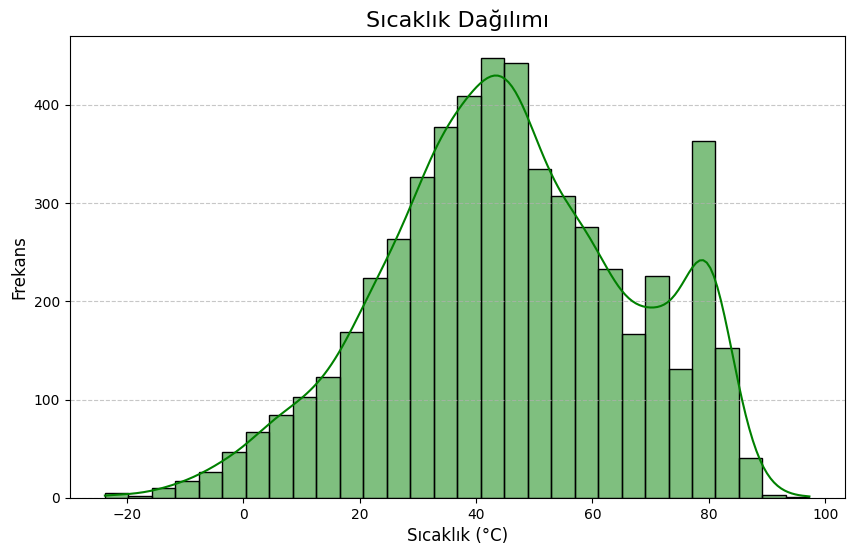

In [ ]:
#sıcaklığın histogram grafiği
plt.figure(figsize=(10, 6))
sns.histplot(data['Sıcaklık'], kde=True, bins=30, color='green')
plt.title('Sıcaklık Dağılımı', fontsize=16)
plt.xlabel('Sıcaklık (°C)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

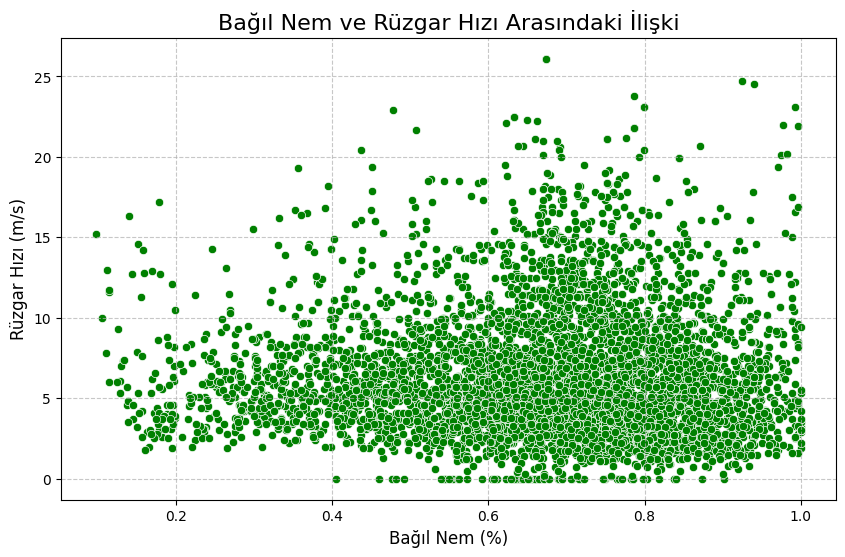

In [ ]:
#Scatter Plot Bağıl nem ve rüzgar hızı arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Bağıl Nem'], y=data['Rüzgar Hızı'], color='green')
plt.title('Bağıl Nem ve Rüzgar Hızı Arasındaki İlişki', fontsize=16)
plt.xlabel('Bağıl Nem (%)', fontsize=12)
plt.ylabel('Rüzgar Hızı (m/s)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


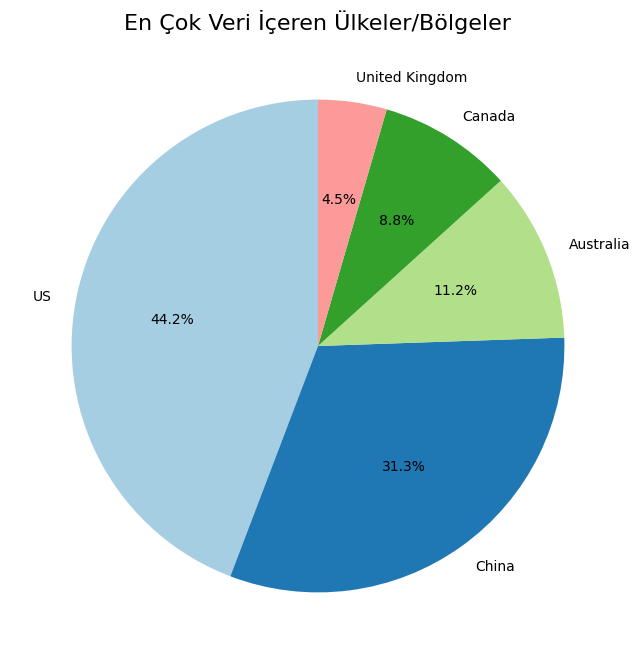

In [ ]:
#Pie Plot Ülke/bölge bazında veri dağılımı
plt.figure(figsize=(8, 8))
country_counts = data['Ülke/Bölge'].value_counts().head(5)
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('En Çok Veri İçeren Ülkeler/Bölgeler', fontsize=16)
plt.show()


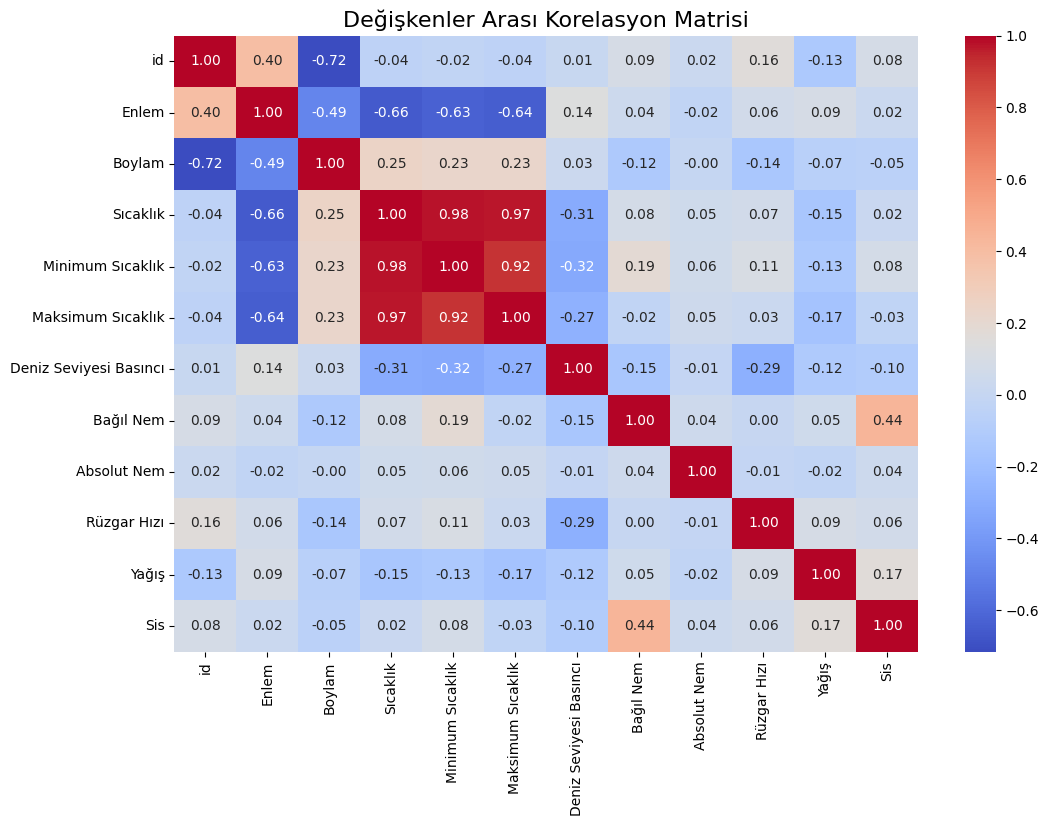

In [ ]:
#Heatmap Sayısal sütunlar arasındaki korelasyonu
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Korelasyon matrisi için ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Değişkenler Arası Korelasyon Matrisi', fontsize=16)
plt.show()


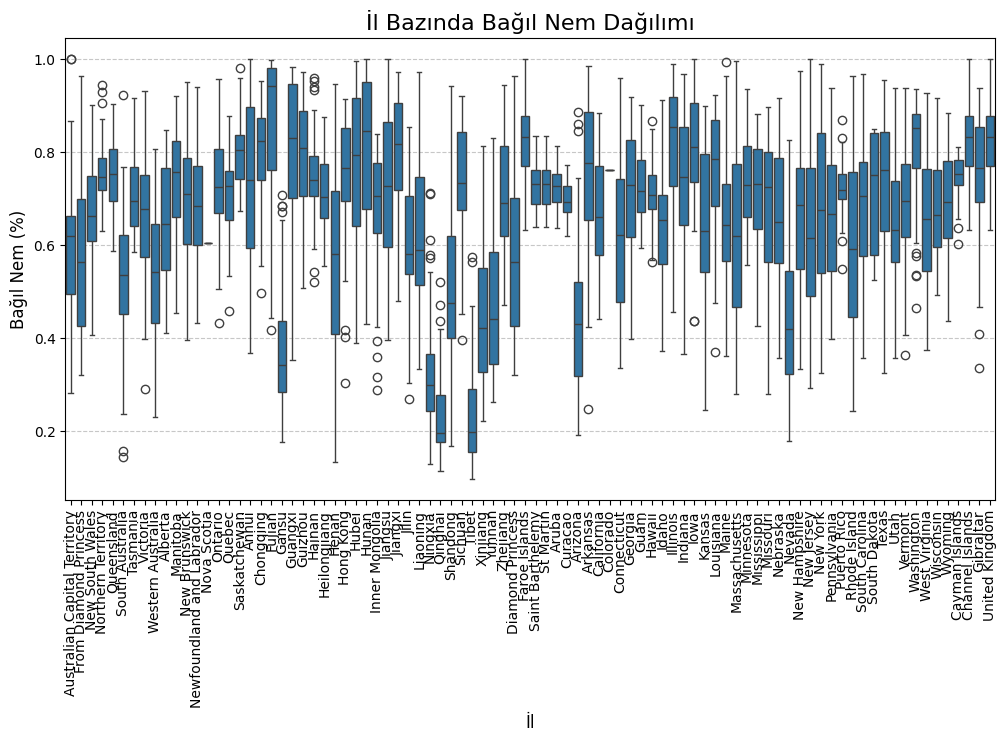

In [ ]:
#Box Plot "İl" bazında "Bağıl Nem" dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(x='İl', y='Bağıl Nem', data=data)
plt.title('İl Bazında Bağıl Nem Dağılımı', fontsize=16)
plt.xlabel('İl', fontsize=12)
plt.ylabel('Bağıl Nem (%)', fontsize=12)
plt.xticks(rotation=90)  # İsimleri tamamen yatay yapar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


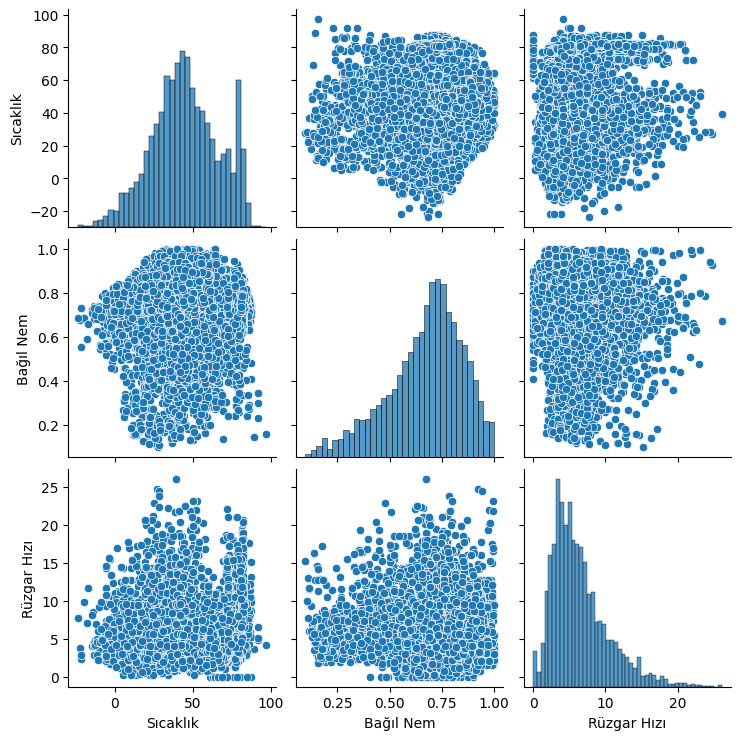

In [ ]:
# Pair Plot Sıcaklık, bağıl nem ve rüzgar hızının ilişkisi
sns.pairplot(data[['Sıcaklık', 'Bağıl Nem', 'Rüzgar Hızı']])
plt.show()


Mean Squared Error (MSE): 8.845120817843869
Root Mean Squared Error (RMSE): 2.974074783498873
R² Skoru: 0.9796927418427934
       Gerçek Sıcaklık  Tahmin Edilen Sıcaklık
13881             38.9                    37.5
15715             32.8                    30.3
3199              44.3                    44.6
15742             36.5                    40.1
3731              62.7                    62.4
...                ...                     ...
3433              48.1                    48.0
14575             29.4                    25.2
3150              52.3                    51.2
16670             43.7                    40.2
15582             43.5                    41.4

[1076 rows x 2 columns]


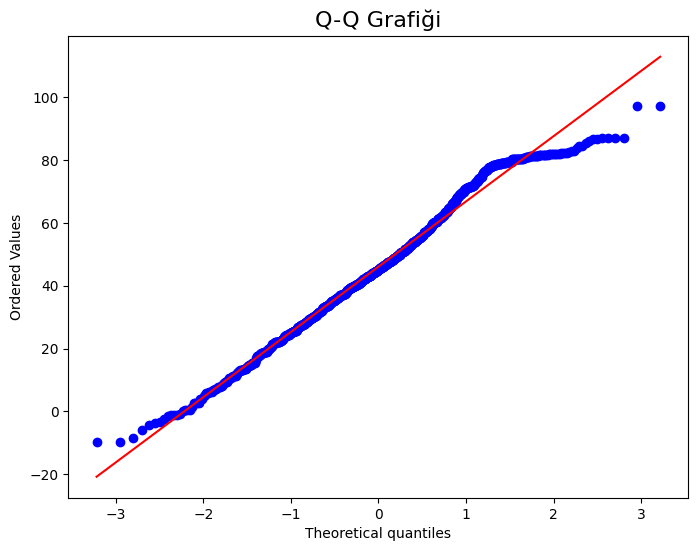

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Özellikleri ve hedef değişkeni ayırma
features = data[['Bağıl Nem', 'Rüzgar Hızı', 'Yağış', 'Deniz Seviyesi Basıncı', 'Enlem', 'Boylam','Sis','Minimum Sıcaklık','Maksimum Sıcaklık']]
target = data['Sıcaklık']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Karar Ağacı modelini oluştur ve eğit
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)
# Modelin doğruluğunu değerlendir
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Sonuçları yazdır
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Skoru: {r2}")
# Gerçek ve tahmin edilen sıcaklıkları karşılaştırma
results = pd.DataFrame({'Gerçek Sıcaklık': y_test, 'Tahmin Edilen Sıcaklık': predictions})
print(results)


# Q-Q grafiği çizmek için:
plt.figure(figsize=(8, 6))
stats.probplot(predictions, dist="norm", plot=plt)
plt.title("Q-Q Grafiği", fontsize=16)
plt.show()


In [ ]:
#iki dizi toplama kodu

#verileri matematiksel işlem için numpy'ye dönüştürdük
temperature = data['Sıcaklık'].to_numpy()
humidity = data['Bağıl Nem'].to_numpy()

# Orijinal matris oluştur (Sütunları birleştir)
original_matrix = np.column_stack((temperature, humidity))

# Element-wise toplama
sum_vector = temperature + humidity

# Nokta çarpım
dot_product = np.dot(temperature, humidity)

# Sonuçları yazdır
print("Orijinal Sıcaklık Vektörü:\n", temperature)
print("\nOrijinal Bağıl Nem Vektörü:\n", humidity)
print("\nOrijinal Matris (Sıcaklık ve Bağıl Nem):\n", original_matrix)
print("\nElement-wise Toplama:\n", sum_vector)
print("\nNokta Çarpım:", dot_product)



Orijinal Sıcaklık Vektörü:
 [77.7 68.6 71.7 ... 40.4 41.8 42. ]

Orijinal Bağıl Nem Vektörü:
 [0.28248178 0.6389216  0.45496165 ... 0.70533083 0.6899451  0.64697421]

Orijinal Matris (Sıcaklık ve Bağıl Nem):
 [[77.7         0.28248178]
 [68.6         0.6389216 ]
 [71.7         0.45496165]
 ...
 [40.4         0.70533083]
 [41.8         0.6899451 ]
 [42.          0.64697421]]

Element-wise Toplama:
 [77.98248178 69.2389216  72.15496165 ... 41.10533083 42.4899451
 42.64697421]

Nokta Çarpım: 165474.5732543496


In [ ]:

# Sıcaklık, Bağıl Nem ve Rüzgar Hızı sütunlarını bir matris oluşturmak
matrix = data[['Sıcaklık', 'Bağıl Nem', 'Rüzgar Hızı']].to_numpy()

# Matrisin transpozunu
matrix_transpose = matrix.T

print("Orijinal Matris:\n", matrix)
print("\nTranspoz Matris:\n", matrix_transpose)


Orijinal Matris:
 [[77.7         0.28248178  6.5       ]
 [68.6         0.6389216   7.3       ]
 [71.7         0.45496165  5.3       ]
 ...
 [40.4         0.70533083  9.5       ]
 [41.8         0.6899451   9.6       ]
 [42.          0.64697421  8.1       ]]

Transpoz Matris:
 [[77.7        68.6        71.7        ... 40.4        41.8
  42.        ]
 [ 0.28248178  0.6389216   0.45496165 ...  0.70533083  0.6899451
   0.64697421]
 [ 6.5         7.3         5.3        ...  9.5         9.6
   8.1       ]]


In [ ]:

#from scipy.stats import skew, kurtosis, gmean, hmean

# Örnek veri seti
data = [10, 12, 15, 18, 21, 21, 23, 25, 30, 30, 30, 40]

# Veri çerçevesi
df = pd.DataFrame(data, columns=["Değerler"])

# Merkezi Eğilim Ölçüleri
mean_val = np.mean(data)
median_val = np.median(data)
mode_val = pd.Series(data).mode().iloc[0]
geometric_mean = gmean(data)
harmonic_mean = hmean(data)

# Değişkenlik Ölçüleri
variance_val = np.var(data, ddof=1)  # Örnek varyansı için ddof=1
std_dev_val = np.std(data, ddof=1)
data_range = np.max(data) - np.min(data)
skewness_val = skew(data)
kurtosis_val = kurtosis(data)
percentiles = np.percentile(data, [25, 50, 75])  # Yüzdelik dilimler

# Sonuçların Yazdırılması
print("MERKEZİ EĞİLİM ÖLÇÜLERİ")
print(f"Ortalama (Mean): {mean_val}")
print(f"Medyan (Median): {median_val}")
print(f"Mod: {mode_val}")
print(f"Geometrik Ortalama: {geometric_mean:.2f}")
print(f"Harmonik Ortalama: {harmonic_mean:.2f}\n")
print("DEĞİŞKENLİK ÖLÇÜLERİ")
print(f"Varyans: {variance_val:.2f}")
print(f"Standart Sapma: {std_dev_val:.2f}")
print(f"Aralık: {data_range}")
print(f"Çarpıklık (Skewness): {skewness_val:.2f}")
print(f"Basıklık (Kurtosis): {kurtosis_val:.2f}")
print(f"1. Çeyrek (25%): {percentiles[0]}")
print(f"Medyan (50%): {percentiles[1]}")
print(f"3. Çeyrek (75%): {percentiles[2]}")


MERKEZİ EĞİLİM ÖLÇÜLERİ
Ortalama (Mean): 22.916666666666668
Medyan (Median): 22.0
Mod: 30
Geometrik Ortalama: 21.33
Harmonik Ortalama: 19.70

DEĞİŞKENLİK ÖLÇÜLERİ
Varyans: 75.17
Standart Sapma: 8.67
Aralık: 30
Çarpıklık (Skewness): 0.29
Basıklık (Kurtosis): -0.56
1. Çeyrek (25%): 17.25
Medyan (50%): 22.0
3. Çeyrek (75%): 30.0


In [ ]:
from scipy.stats import bernoulli

# Başarı durumu oluştur (örneğin, Rüzgar Hızı > 10)
data['Başarı_Durumu'] = (data['Rüzgar Hızı'] > 10).astype(int)

# Başarı oranını (p) hesapla
p = data['Başarı_Durumu'].mean()

# Bernoulli dağılımına göre simülasyon yap
simulated_data = bernoulli.rvs(p, size=len(data))

# Sonuçları yazdır
print(f"Gerçek Başarı Oranı (p): {p}")
print(f"Simülasyon - Ortalama: {simulated_data.mean()}, Varyans: {simulated_data.var()}")


Gerçek Başarı Oranı (p): 0.16511714391967275
Simülasyon - Ortalama: 0.16679062848642617, Varyans: 0.13897151473552913


In [ ]:
#from scipy.stats import binom


# 1. Yağış sütunu kontrolü ve başarı olasılığını belirleme
if 'Yağış' in data.columns:
    # Koşul: Yağış > 0 ise başarı (1), değilse başarısızlık (0)
    data['Yağış_Var'] = (data['Yağış'] > 0).astype(int)

    # 2. Gerçek başarı oranını (p) hesaplama
    p = data['Yağış_Var'].mean()
    print(f"Gerçek Başarı Oranı (p): {p}")

    # 3. Binom dağılımı simülasyonu
    n = 10  # Deneme sayısı (örneğin 10 gün boyunca yağış gözlemi)
    binom_simulation = binom.rvs(n, p, size=len(data))

    # 4. Ortalama ve varyans hesaplama
    ortalama = binom_simulation.mean()
    varyans = binom_simulation.var()

    # Simülasyon sonuçlarını veri setine ekleme
    data['Binom_Simülasyonu'] = binom_simulation

    # 5. Sonuçları yazdırma
    print(f"Binom Simülasyonu - Ortalama: {ortalama}, Varyans: {varyans}")
else:
    print("Hata: 'Yağış' sütunu bulunamadı. Lütfen sütun adlarını kontrol edin!")

# İlk 5 satırı göster
print(data[['Yağış', 'Yağış_Var', 'Binom_Simülasyonu']].head())


In [ ]:
#from scipy.stats import poisson


# 1. Yağış sütununu kontrol etme
if 'Yağış' in data.columns:
    # Koşul: Yağış > 0 olan gün sayısını sıklık olarak hesaplama
    olay_sayısı = data['Yağış'].apply(lambda x: 1 if x > 0 else 0).sum()
    toplam_gün = len(data)

    # Ortalama olay sayısını (mu) hesaplama
    mu = olay_sayısı / toplam_gün
    print(f"Ortalama Olay Sayısı (mu): {mu}")

    # 2. Poisson dağılımı simülasyonu
    poisson_simulation = poisson.rvs(mu, size=len(data))

    # 3. Ortalama ve varyans hesaplama
    ortalama = poisson_simulation.mean()
    varyans = poisson_simulation.var()

    # Simülasyon sonuçlarını veri setine ekleme
    data['Poisson_Simülasyonu'] = poisson_simulation

    # 4. Sonuçları yazdırma
    print(f"Poisson Simülasyonu - Ortalama: {ortalama}, Varyans: {varyans}")
else:
    print("Hata: 'Yağış' sütunu bulunamadı. Lütfen sütun adlarını kontrol edin!")

# İlk 5 satırı göster
print(data[['Yağış', 'Poisson_Simülasyonu']].head())


Ortalama Olay Sayısı (mu): 0.34864261807363334
Poisson Simülasyonu - Ortalama: 0.3512458162885831, Varyans: 0.3491068525531548
     Yağış  Poisson_Simülasyonu
504   0.00                    0
505   0.25                    0
506   0.00                    0
507   0.00                    0
508   0.00                    0


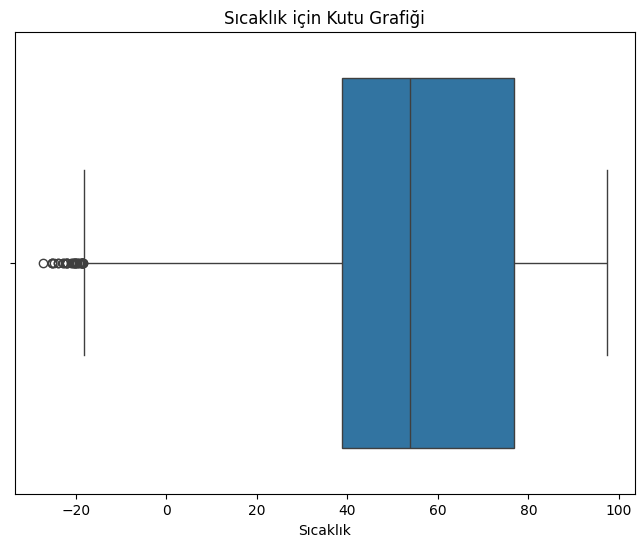

Z Puanı ile Tespit Edilen Aykırı Değer Sayısı: 74
Z Puanı ile Temizlenmiş Veri Boyutu: 17818
IQR ile Tespit Edilen Aykırı Değer Sayısı: 36
IQR ile Temizlenmiş Veri Boyutu: 17856


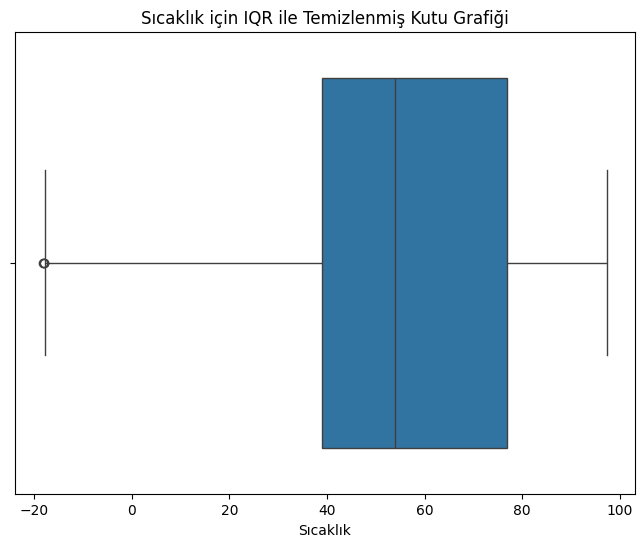

In [ ]:

# Analiz edilecek sütunu belirleme
sütun_adı = 'Sıcaklık'  # Aykırı değer tespiti için kullanılacak sütun
if sütun_adı in data.columns:
    sütun_verisi = data[sütun_adı].dropna()

    # -------------------- 1. Görselleştirme --------------------
    # Kutu Grafiği (Boxplot)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=sütun_verisi)
    plt.title(f"{sütun_adı} için Kutu Grafiği")
    plt.show()



    # -------------------- 2. Z Puanı (Z-Score) --------------------
    from scipy.stats import zscore

    z_scores = zscore(sütun_verisi)
    threshold = 3  # Eşik değer: |Z| > 3 olan değerler aykırıdır
    aykırı_indeksler = np.where(np.abs(z_scores) > threshold)

    print(f"Z Puanı ile Tespit Edilen Aykırı Değer Sayısı: {len(aykırı_indeksler[0])}")

    # Aykırı değerlerin kaldırılması
    temiz_veri_z = sütun_verisi[np.abs(z_scores) <= threshold]
    print(f"Z Puanı ile Temizlenmiş Veri Boyutu: {len(temiz_veri_z)}")

    # -------------------- 3. Çeyrekler Arası Aralık (IQR) --------------------
    Q1 = sütun_verisi.quantile(0.25)  # 1. Çeyrek
    Q3 = sütun_verisi.quantile(0.75)  # 3. Çeyrek
    IQR = Q3 - Q1  # IQR hesaplama

    # Alt ve üst sınırların belirlenmesi
    alt_sınır = Q1 - 1.5 * IQR
    üst_sınır = Q3 + 1.5 * IQR

    # Aykırı değerlerin tespiti
    aykırı_indeksler_iqr = sütun_verisi[(sütun_verisi < alt_sınır) | (sütun_verisi > üst_sınır)].index
    print(f"IQR ile Tespit Edilen Aykırı Değer Sayısı: {len(aykırı_indeksler_iqr)}")

    # Aykırı değerlerin kaldırılması
    temiz_veri_iqr = sütun_verisi[(sütun_verisi >= alt_sınır) & (sütun_verisi <= üst_sınır)]
    print(f"IQR ile Temizlenmiş Veri Boyutu: {len(temiz_veri_iqr)}")

    # -------------------- Sonuçları Görselleştirme --------------------
    # Temizlenmiş verilerin kutu grafiği
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=temiz_veri_iqr)
    plt.title(f"{sütun_adı} için IQR ile Temizlenmiş Kutu Grafiği")
    plt.show()

else:
    print(f"Hata: '{sütun_adı}' sütunu bulunamadı. Lütfen sütun adlarını kontrol edin!")


In [ ]:
#from scipy.stats import ttest_1samp

# Sıcaklık sütunu üzerinden hipotez testi
sütun_adı = 'Sıcaklık'
mu = 25  # Popülasyon ortalaması

# Hipotez testi
if sütun_adı in data.columns:
    stat, p_value = ttest_1samp(data[sütun_adı].dropna(), popmean=mu)
    print(f"T-Test İstatistiği: {stat:.4f}, P-Değeri: {p_value:.4f}")

    if p_value < 0.05:
        print("H0 reddedilir: Ortalamada anlamlı farklılık var.")
    else:
        print("H0 kabul edilir: Ortalama mu'ya eşittir.")
else:
    print(f"Hata: '{sütun_adı}' sütunu bulunamadı.")


T-Test İstatistiği: 178.9945, P-Değeri: 0.0000
H0 reddedilir: Ortalamada anlamlı farklılık var.


In [ ]:
#from scipy.stats import chi2_contingency

# Yağış ve Sis sütunlarına göre çapraz tablo
cross_tab = pd.crosstab(data['Yağış'] > 0, data['Sis'] > 0)

# Ki-Kare testi
stat, p_value, _, _ = chi2_contingency(cross_tab)
print(f"Ki-Kare Testi: Test İstatistiği: {stat:.4f}, P-Değeri: {p_value:.4f}")

if p_value < 0.05:
    print("H0 reddedilir: Değişkenler arasında ilişki vardır.")
else:
    print("H0 kabul edilir: Değişkenler arasında ilişki yoktur.")


Ki-Kare Testi: Test İstatistiği: 1398.2819, P-Değeri: 0.0000
H0 reddedilir: Değişkenler arasında ilişki vardır.


In [ ]:
# Kovaryans
kovaryans = data['Sıcaklık'].cov(data['Yağış'])
print(f"Kovaryans (Sıcaklık ve Yağış): {kovaryans:.4f}")

# Korelasyon
korelasyon = data['Sıcaklık'].corr(data['Yağış'])
print(f"Korelasyon (Sıcaklık ve Yağış): {korelasyon:.4f}")


Kovaryans (Sıcaklık ve Yağış): -39.7414
Korelasyon (Sıcaklık ve Yağış): -0.1487


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hedef değişkeni kategorik hale getirme
data['Enlem_Kategori'] = pd.cut(data['Enlem'], bins=3, labels=['Düşük', 'Orta', 'Yüksek'])

# Bağımsız ve bağımlı değişkenleri seçme
X = data[['Sıcaklık', 'Yağış', 'Rüzgar Hızı']]  # Bağımsız değişkenler
y = data['Enlem_Kategori']  # Kategorik hedef değişken

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar Ağacı Modeli
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nKarar Ağacı Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Lojistik Regresyon Modeli
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLojistik Regresyon Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Karar Ağacı Modeli:
Doğruluk Skoru: 0.8197026022304833
Confusion Matrix:
 [[ 56  24  24]
 [ 28  89  37]
 [ 30  51 737]]
Classification Report:
               precision    recall  f1-score   support

       Düşük       0.49      0.54      0.51       104
        Orta       0.54      0.58      0.56       154
      Yüksek       0.92      0.90      0.91       818

    accuracy                           0.82      1076
   macro avg       0.65      0.67      0.66      1076
weighted avg       0.83      0.82      0.82      1076


Lojistik Regresyon Modeli:
Doğruluk Skoru: 0.8420074349442379
Confusion Matrix:
 [[ 21  51  32]
 [ 17  92  45]
 [  1  24 793]]
Classification Report:
               precision    recall  f1-score   support

       Düşük       0.54      0.20      0.29       104
        Orta       0.55      0.60      0.57       154
      Yüksek       0.91      0.97      0.94       818

    accuracy                           0.84      1076
   macro avg       0.67      0.59      0.60      1

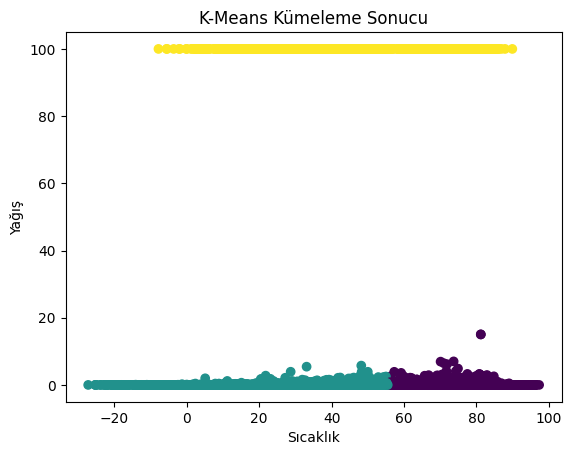

In [ ]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

# Kümeleme için bağımsız değişkenler
X_cluster = data[['Sıcaklık', 'Yağış']]


# K-Means Kümeleme Modeli
kmeans = KMeans(n_clusters=3, random_state=42)
data['Küme'] = kmeans.fit_predict(X_cluster)

# Kümeleme sonuçlarını görselleştirme
plt.scatter(X_cluster['Sıcaklık'], X_cluster['Yağış'], c=data['Küme'], cmap='viridis')
plt.title('K-Means Kümeleme Sonucu')
plt.xlabel('Sıcaklık')
plt.ylabel('Yağış')
plt.show()




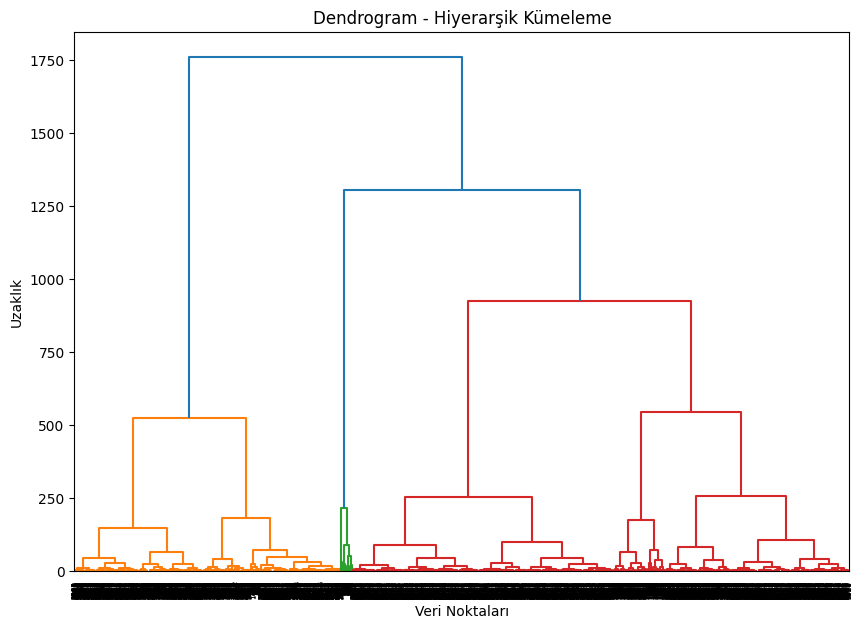

In [ ]:
#import scipy.cluster.hierarchy as sch

# Hiyerarşik Kümeleme için veri seçimi
X_hierarchical = data[['Sıcaklık', 'Yağış']]

# Dendrogram çizimi
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_hierarchical, method='ward'))
plt.title('Dendrogram - Hiyerarşik Kümeleme')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklık')
plt.show()
